# Central Limit Theorem - Demonstration EGN3443

Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)

This is a human-readable summary of (and not a substitute for) the license.
Disclaimer: https://creativecommons.org/licenses/by-sa/4.0/legalcode

You are free to:
- Share: copy and redistribute the material in any medium or format.
- Adapt: remix, transform, and build upon the material for any purpose, even commercially.

Under the following terms:
- Attribution: You must give appropriate credit, provide a link to the license, and indicate if changes were made. 
- ShareAlike: If you remix, transform, or build upon the material, you must distribute your contributions under the same license as the original.

Full license text can be found at: 
https://creativecommons.org/licenses/by-sa/4.0/legalcode

Copyright (c) 2026 Raghav Gnanasambandam

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42)
rng = np.random.default_rng()

## Section 1: Bernoulli Distribution
### Say, $X \sim Bernoulli(0.5)$

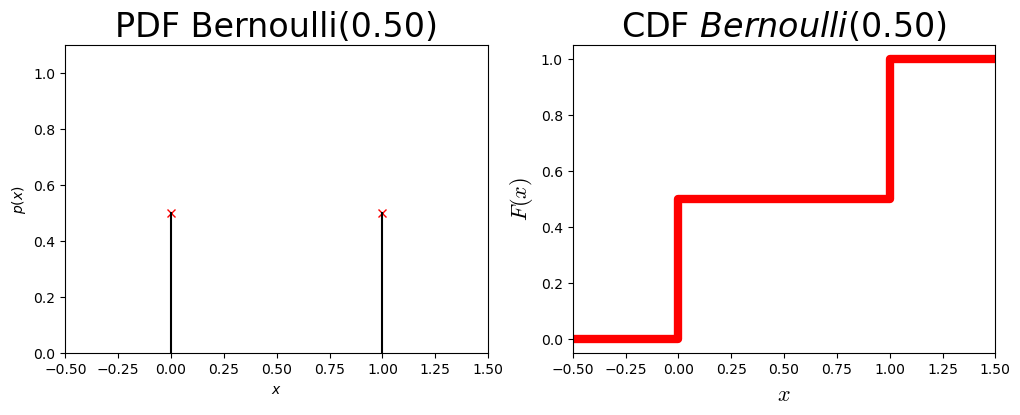

In [2]:
p = 0.5

fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,4)


ax[0].plot([0,1],[1-p,p],'rx',linewidth = 6)
ax[0].plot([0,0],[0,1-p],'k')
ax[0].plot([1,1],[0,p],'k')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$p(x)$')
ax[0].set_title('PDF Bernoulli(%.2f)'%p, fontsize = 24)
ax[0].set_xlim([-0.5,1.5])
ax[0].set_ylim([0,1.1])

ax[1].plot([-0.5,0,0,1,1,1.5],[0,0,1-p,1-p,1,1],'r',linewidth = 6)
ax[1].set_xlabel('$x$',math_fontfamily = 'cm',fontsize = 16)
ax[1].set_ylabel('$F(x)$', math_fontfamily = 'cm',fontsize = 16)
ax[1].set_title('CDF $Bernoulli(%.2f)$'%p, fontsize = 24)
ax[1].set_xlim([-0.5,1.5])

plt.show()

### Let's visualize a random sample of size 20 from $Bernoulli(0.5)$

[0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0]


(0.0, 20.0)

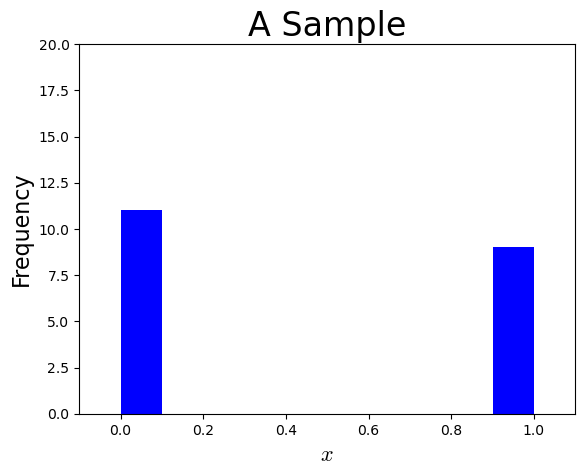

In [3]:
n = 20 #Sample Size

x = rng.binomial(1,p,(n,))
print(x)

fig,ax = plt.subplots()

ax.hist(x,color='b')
ax.set_xlabel('$x$',math_fontfamily = 'cm', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.set_title('A Sample', fontsize = 24)
ax.set_xlim([-0.1,1.1])
ax.set_ylim([0,n])



### Let's look at five different samples of same size

Sample 1  [0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1]
Sample 2  [1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1]
Sample 3  [0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0]
Sample 4  [0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0]
Sample 5  [0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1]


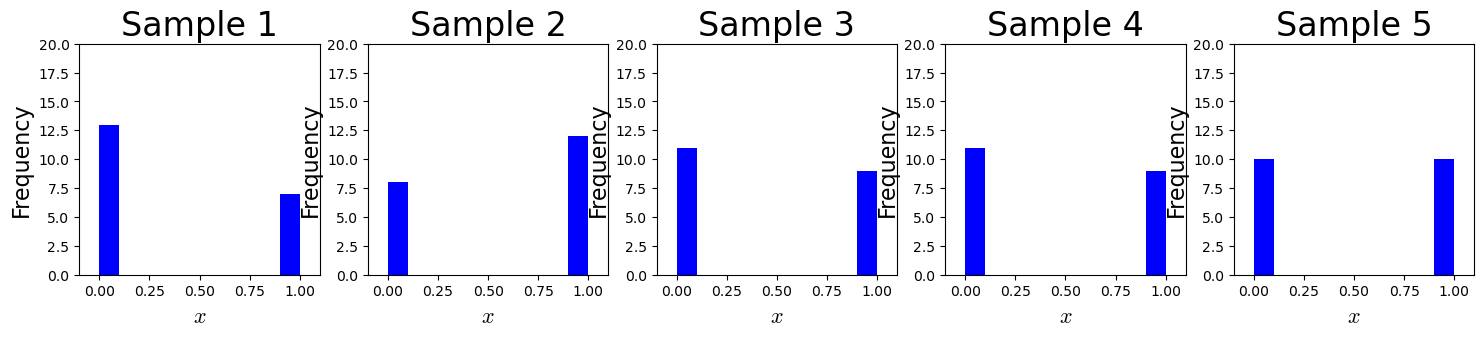

In [4]:
t = 5 #number of samples

fig,ax = plt.subplots(1,5)
fig.set_size_inches(18,3)
sample_mean_x = np.zeros(t)

for i in range(t):
    x = rng.binomial(1,p,(n,))
    sample_mean_x[i] = np.mean(x)
    print("Sample %d "%(i+1),x)

  

    ax[i].hist(x,color='b')
    ax[i].set_xlabel('$x$',math_fontfamily = 'cm', fontsize = 16)
    ax[i].set_ylabel('Frequency', fontsize = 16)
    ax[i].set_title('Sample %d'%(i+1), fontsize = 24)
    ax[i].set_xlim([-0.1,1.1])
    ax[i].set_ylim([0,n])


# How is the mean of the samples distributed?

(0.0, 5.0)

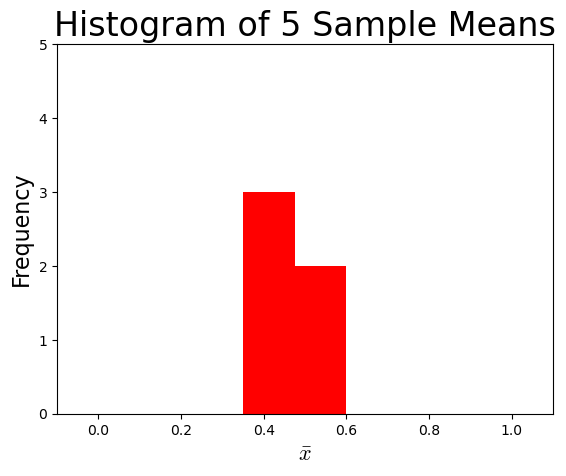

In [5]:

fig,ax = plt.subplots()

ax.hist(sample_mean_x,bins = 2,color='r')
ax.set_xlabel('$ \\bar{x} $',math_fontfamily = 'cm', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.set_title('Histogram of %d Sample Means'%t, fontsize = 24)
ax.set_xlim([-0.1,1.1],auto=True)
ax.set_ylim([0,t])



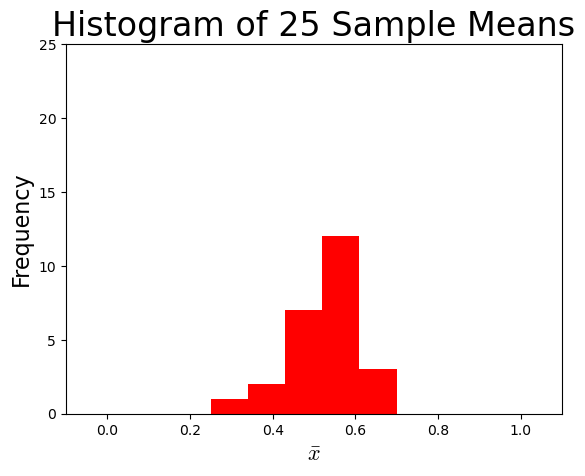

In [6]:
t = 25 #number of samples

def sample_means(p,n,t):
    sample_mean_x = np.zeros(t)
    for i in range(t):
        x = rng.binomial(1,p,(n,))
        sample_mean_x[i] = np.mean(x)
        # print("Sample %d "%(i+1),x)

    return sample_mean_x

fig,ax = plt.subplots()

ax.hist(sample_means(p,n,t),bins = int(np.rint(np.sqrt(t))),color='r')
ax.set_xlabel('$\\bar{x}$',math_fontfamily = 'cm', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.set_title('Histogram of %d Sample Means'%t, fontsize = 24)
ax.set_xlim([-0.1,1.1],auto=True)
ax.set_ylim([0,t])

plt.show()

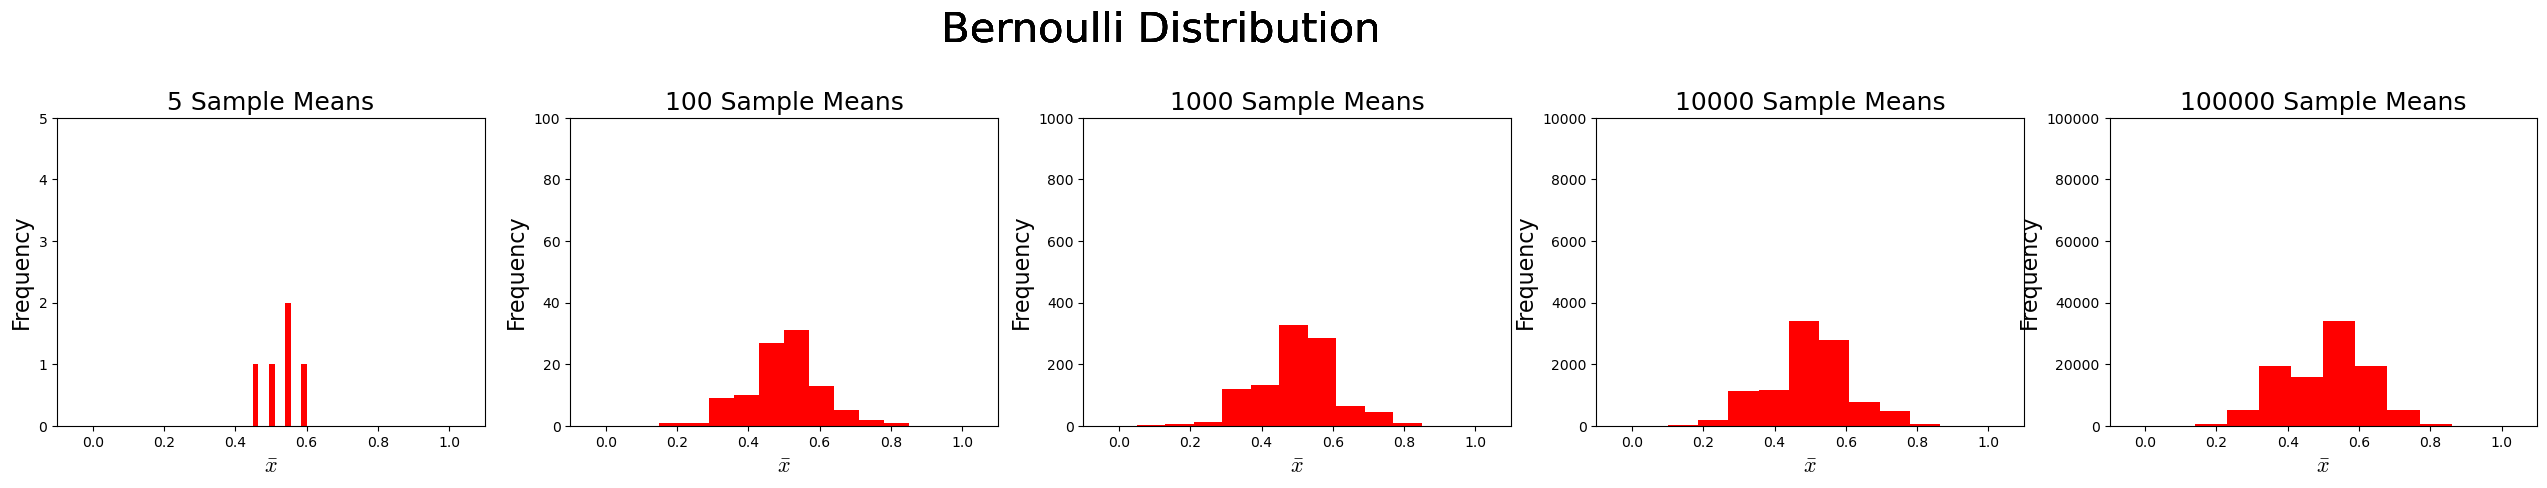

In [7]:
t_s = [5,100,1000,10000,100000]


fig,ax = plt.subplots(1,5)
fig.set_size_inches(32,4)

i = 0 
for t in t_s:
    # ax[i].hist(sample_means(p,n,t),bins = int(np.rint(np.sqrt(t))),color='b')
    ax[i].hist(sample_means(p,n,t),color = 'r')
    ax[i].set_xlabel('$\\bar{x}$',math_fontfamily = 'cm', fontsize = 16)
    ax[i].set_ylabel('Frequency', fontsize = 16)
    ax[i].set_title('%d Sample Means'%t, fontsize = 18)
    ax[i].set_xlim([-0.1,1.1])
    ax[i].set_ylim([0,t])
    ax[i].ticklabel_format(axis = 'y',style = 'sci')

    i = i+1

    ax[2].text(-0.5,1250,'Bernoulli Distribution',fontsize = 30)

## Section 2: Uniform Distribution
### Say, $X \sim Uniform(5,8)$


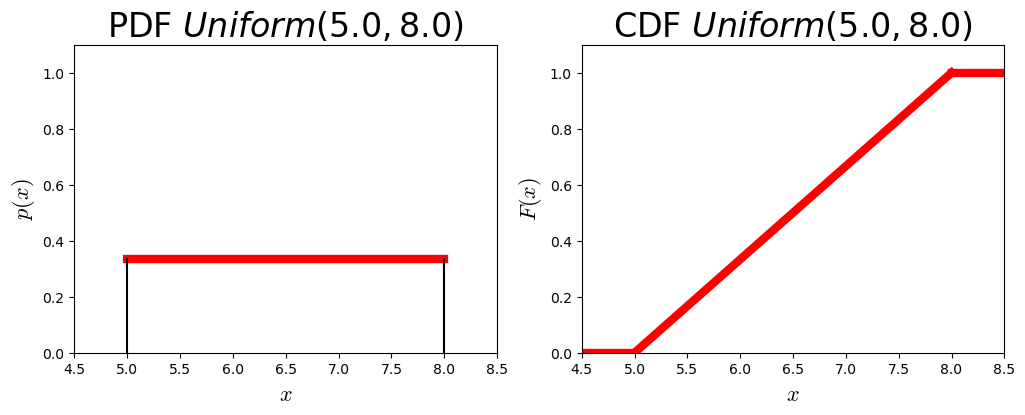

In [8]:
unif_a = 5
unif_b = 8


fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

x = np.linspace(unif_a,unif_b,100)

ax[0].plot(x,np.ones(x.shape)/(unif_b-unif_a),'r',linewidth = 6)
# ax[0].plot([x_pdf[i],x_pdf[i]],[0,poisson_pdf_vals[i]],'k')
ax[0].plot([unif_a,unif_a],[0,1/(unif_b-unif_a)],'k')
ax[0].plot([unif_b,unif_b],[0,1/(unif_b-unif_a)],'k')
ax[0].set_xlabel('$x$',math_fontfamily = 'cm',fontsize = 16)
ax[0].set_ylabel('$p(x)$',math_fontfamily = 'cm',fontsize = 16)
ax[0].set_title('PDF $Uniform(%.1f,%.1f)$'%(unif_a,unif_b), fontsize = 24)
ax[0].set_xlim([unif_a-0.5,unif_b+0.5])
ax[0].set_ylim([0,1.1])

ax[1].plot([unif_a-1,unif_a],[0,0],'r',linewidth = 6)
ax[1].plot([unif_a,unif_b],[0,1],'r',linewidth = 6)
ax[1].plot([unif_b,unif_b+1],[1,1],'r',linewidth = 6)
ax[1].set_xlabel('$x$',math_fontfamily = 'cm',fontsize = 16)
ax[1].set_ylabel('$F(x)$', math_fontfamily = 'cm',fontsize = 16)
ax[1].set_title('CDF $Uniform(%.1f,%.1f)$'%(unif_a,unif_b), fontsize = 24)
ax[1].set_xlim([unif_a-0.5,unif_b+0.5])
ax[1].set_ylim([0,1.1])

plt.show()
### A Random Sample of size 20 from $Bernoulli(0.3)$

### A Random Sample of size 20 from $Uniform(5,8)$

Sample =  [6.95994582 6.4533983  6.96659439 5.7313505  5.13252311 5.77256299
 6.26939225 6.00183237 7.7406314  7.74866005 7.17959776 5.99113833
 7.85095939 7.30558727 7.38736535 5.71913421 5.25486507 5.19796999
 5.44339277 5.05135674]


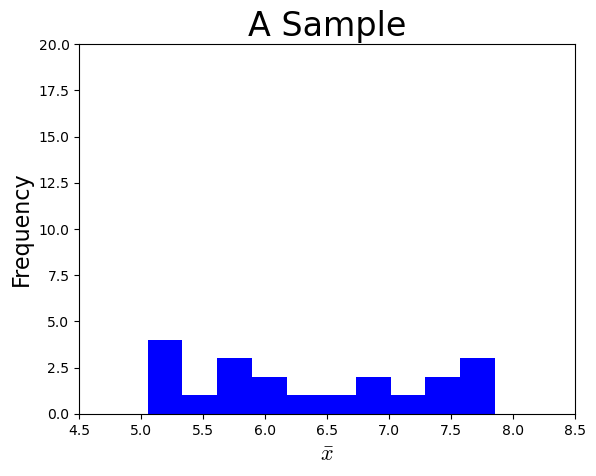

In [9]:
n = 20 #Sample Size

x = rng.uniform(unif_a,unif_b,(n,))
print("Sample = ",x)

fig,ax = plt.subplots()

ax.hist(x,color='b')
ax.set_xlabel('$\\bar{x}$',math_fontfamily = 'cm', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.set_title('A Sample', fontsize = 24)
ax.set_xlim([unif_a - 0.5,unif_b + 0.5])
ax.set_ylim([0,n])

plt.show()


### Let's look at five different samples of same size


 Sample 1 =  [6.59945816 7.45072148 5.60556387 7.98564575 5.46202643 5.79717537
 7.01676721 7.47914128 5.92199134 5.46794923 5.55669822 5.36516053
 7.2092197  6.46896047 5.81672498 7.96951361 6.50282837 7.54676912
 6.94772085 6.08766458]

 Sample 2 =  [5.1417617  6.04570093 6.53167222 6.68586168 6.62278365 5.3044434
 7.65653379 6.04230321 5.47443449 6.69410454 6.62194937 7.96736231
 7.94657973 7.53360459 7.12796763 6.40224775 7.49036376 7.10626946
 7.95531978 5.24505995]

 Sample 3 =  [6.15690177 5.97654386 5.63025157 6.04846665 6.09774863 6.56478397
 7.71330888 5.10548705 7.33481011 7.22783133 5.13587656 7.85540665
 5.91934165 7.24277678 6.09292035 5.01600912 7.46197367 5.45035132
 5.68793129 7.70908212]

 Sample 4 =  [6.5809116  6.25143725 7.51276634 7.34489656 5.31207903 7.57803456
 7.28268624 7.19976628 5.77247051 5.49423804 7.397191   7.9688932
 7.93843876 7.11623134 5.43198309 7.45625029 7.91971874 5.86284194
 7.48321485 5.28803909]

 Sample 5 =  [5.44951659 5.84469835 5.3264962

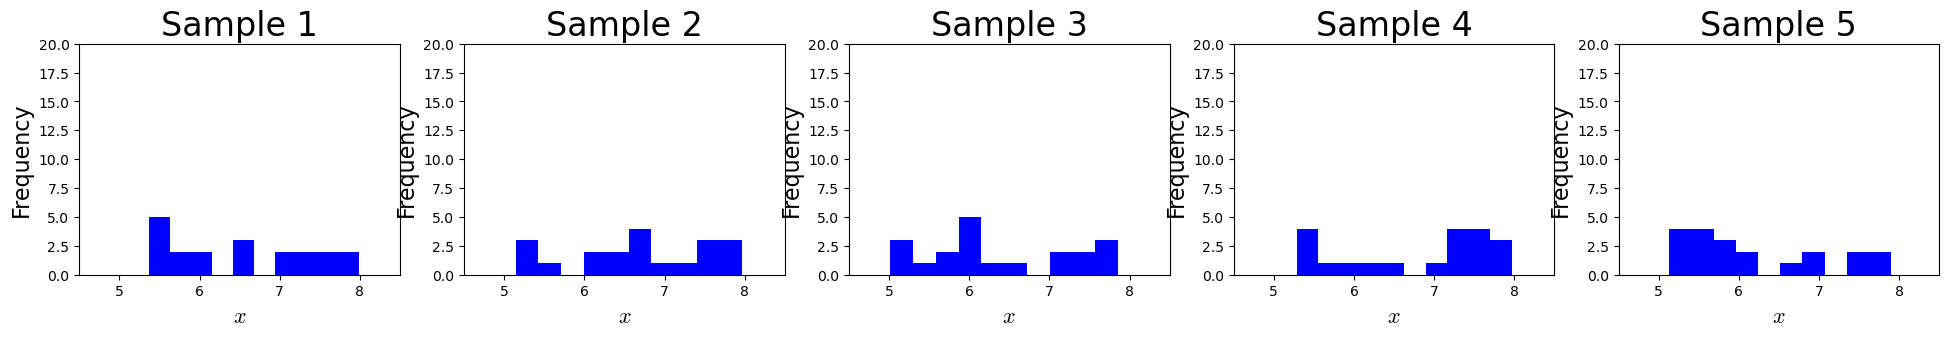

In [10]:
t = 5 #number of samples

fig,ax = plt.subplots(1,5)
fig.set_size_inches(24,3)
sample_mean_x = np.zeros(t)

for i in range(t):
    x = rng.uniform(unif_a,unif_b,(n,))
    sample_mean_x[i] = np.mean(x)
    print("\n Sample %d = "%(i+1),x)

  

    ax[i].hist(x,color='b')
    ax[i].set_xlabel('$x$',math_fontfamily = 'cm', fontsize = 16)
    ax[i].set_ylabel('Frequency', fontsize = 16)
    ax[i].set_title('Sample %d'%(i+1), fontsize = 24)
    ax[i].set_xlim([unif_a - 0.5,unif_b + 0.5])
    ax[i].set_ylim([0,n])

plt.show()


# How is the mean of the samples distributed?

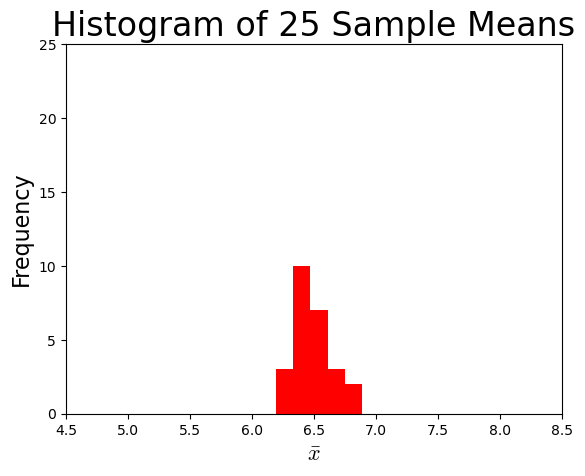

In [11]:
t = 25 #number of samples

def sample_means(unif_a,unif_b,n,t):
    sample_mean_x = np.zeros(t)
    for i in range(t):
        x = rng.uniform(unif_a,unif_b,(n,))
        sample_mean_x[i] = np.mean(x)
        # print("Sample %d "%(i+1),x)

    return sample_mean_x

fig,ax = plt.subplots()

ax.hist(sample_means(unif_a,unif_b,n,t),bins = int(np.rint(np.sqrt(t))),color='r')
ax.set_xlabel('$\\bar{x}$',math_fontfamily = 'cm', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.set_title('Histogram of %d Sample Means'%t, fontsize = 24)
ax.set_xlim([unif_a - 0.5,unif_b + 0.5])
ax.set_ylim([0,t])

plt.show()

Text(0, 1250, 'Uniform Distribution')

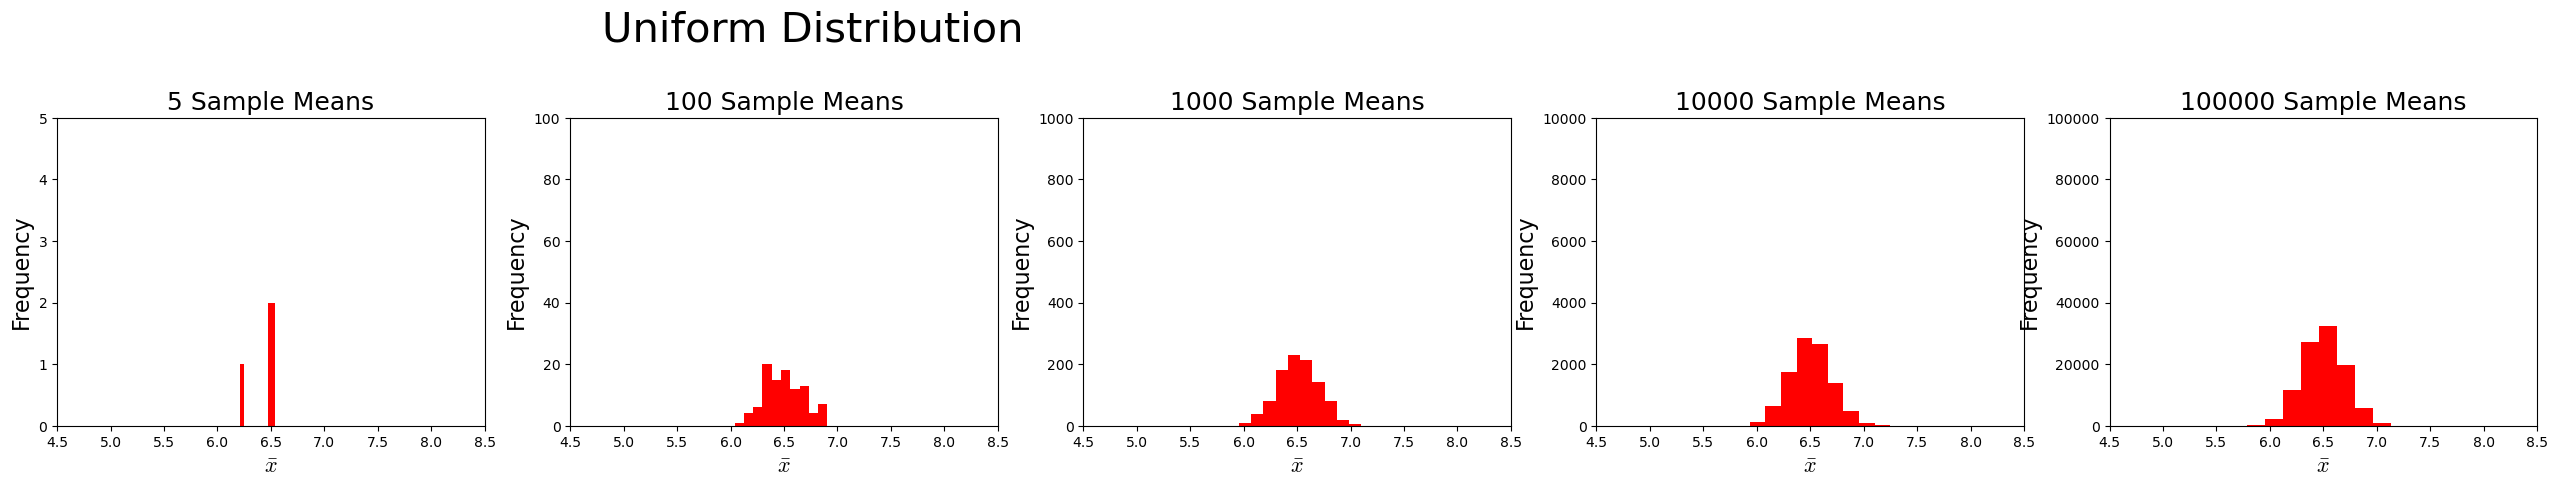

In [12]:
t_s = [5,100,1000,10000,100000]


fig,ax = plt.subplots(1,5)
fig.set_size_inches(32,4)

i = 0 
for t in t_s:
    # ax[i].hist(sample_means(p,n,t),bins = int(np.rint(np.sqrt(t))),color='b')
    ax[i].hist(sample_means(unif_a,unif_b,n,t),color = 'r')
    ax[i].set_xlabel('$\\bar{x}$',math_fontfamily = 'cm', fontsize = 16)
    ax[i].set_ylabel('Frequency', fontsize = 16)
    ax[i].set_title('%d Sample Means'%t, fontsize = 18)
    ax[i].set_xlim([unif_a - 0.5,unif_b + 0.5])
    ax[i].set_ylim([0,t])

    i = i+1
    
ax[2].text(0,1250,'Uniform Distribution',fontsize = 30)

## Section 3: Let's do the same exercise for Exponential distribution
### Say $X \sim Exponential(0.7)$


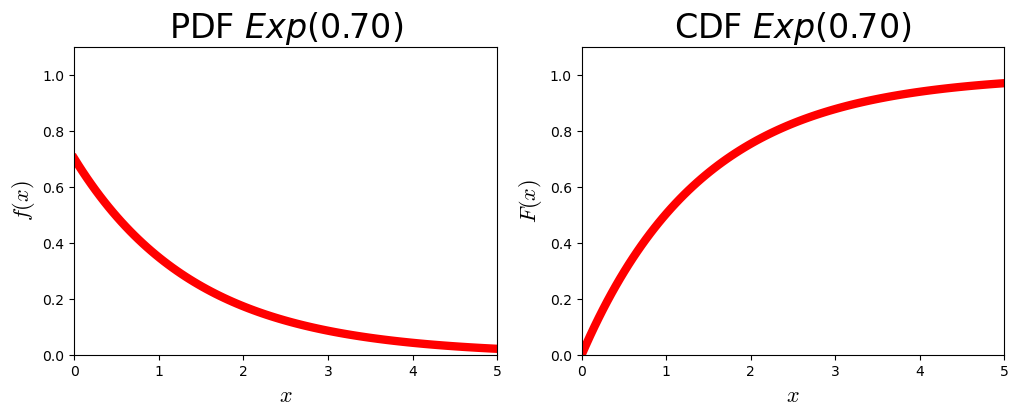

In [13]:
lamb_da = 0.7


fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

x = np.linspace(0,5,100)

ax[0].plot(x,lamb_da*np.exp(-1*lamb_da*x),'r',linewidth = 6)
# ax[0].plot([x_pdf[i],x_pdf[i]],[0,poisson_pdf_vals[i]],'k')
# ax[0].plot([unif_a,unif_a],[0,1/(unif_b-unif_a)],'k')
# ax[0].plot([unif_b,unif_b],[0,1/(unif_b-unif_a)],'k')
ax[0].set_xlabel('$x$',math_fontfamily = 'cm',fontsize = 16)
ax[0].set_ylabel('$f(x)$',math_fontfamily = 'cm',fontsize = 16)
ax[0].set_title('PDF $Exp(%.2f)$'%(lamb_da), fontsize = 24)
ax[0].set_xlim([0,5])
ax[0].set_ylim([0,1.1])

ax[1].plot(x,1 - np.exp(-1*lamb_da*x),'r',linewidth = 6)
# ax[1].plot([unif_a-1,unif_a],[0,0],'r',linewidth = 6)
# ax[1].plot([unif_a,unif_b],[0,1],'r',linewidth = 6)
# ax[1].plot([unif_b,unif_b+1],[1,1],'r',linewidth = 6)
ax[1].set_xlabel('$x$',math_fontfamily = 'cm',fontsize = 16)
ax[1].set_ylabel('$F(x)$', math_fontfamily = 'cm',fontsize = 16)
ax[1].set_title('CDF $Exp(%.2f)$'%(lamb_da), fontsize = 24)
ax[1].set_xlim([0,5])
ax[1].set_ylim([0,1.1])


plt.show()

Text(-1, 1250, 'Exponential Distribution')

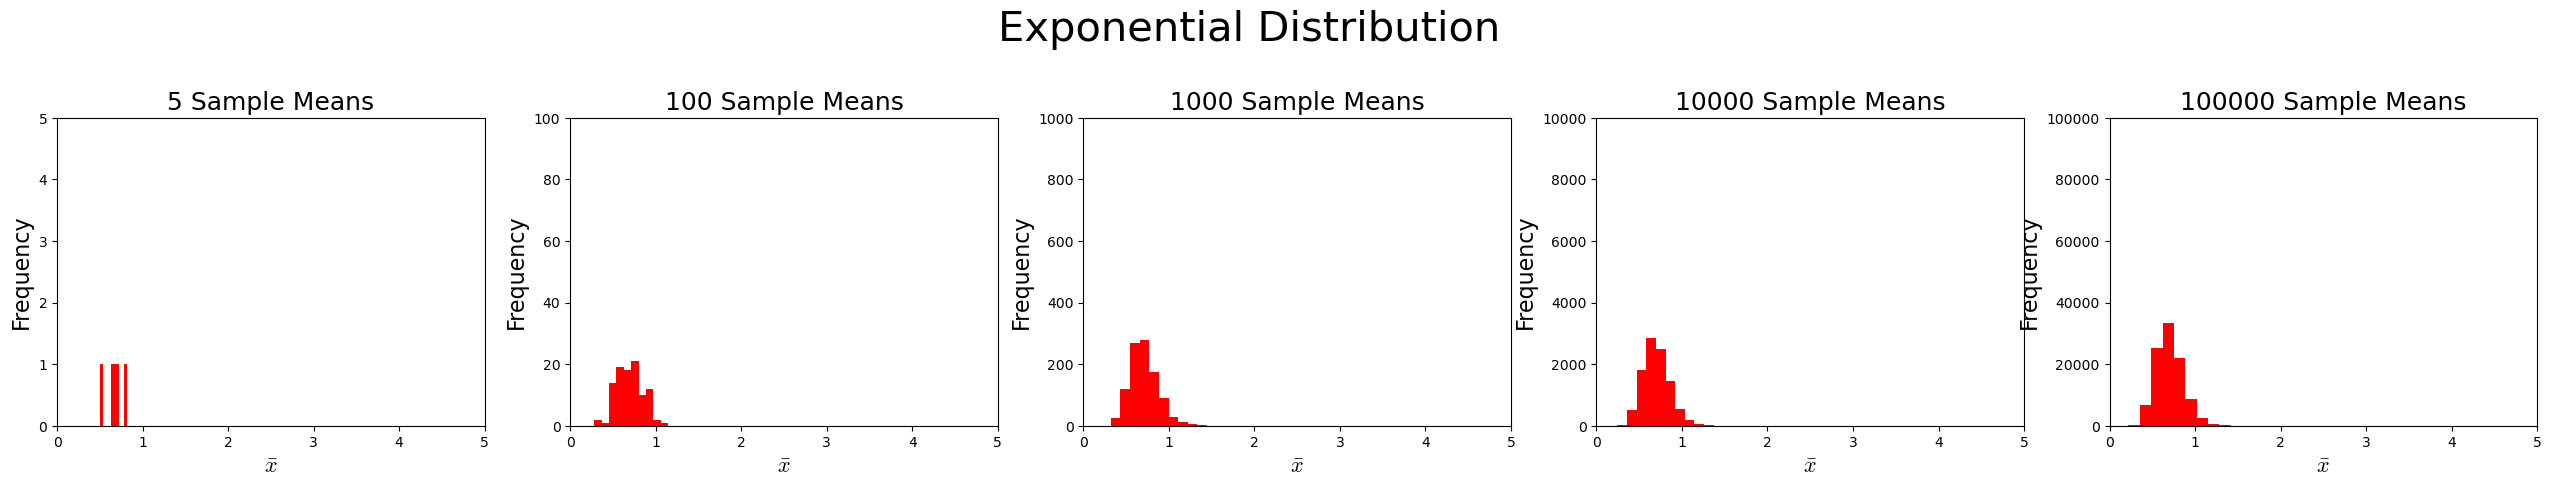

In [14]:
def sample_means(lamb_da,n,t):
    sample_mean_x = np.zeros(t)
    for i in range(t):
        x = rng.exponential(lamb_da,(n,))
        sample_mean_x[i] = np.mean(x)
        # print("Sample %d "%(i+1),x)

    return sample_mean_x

t_s = [5,100,1000,10000,100000]


fig,ax = plt.subplots(1,5)
fig.set_size_inches(32,4)

i = 0 
for t in t_s:
    # ax[i].hist(sample_means(p,n,t),bins = int(np.rint(np.sqrt(t))),color='b')
    ax[i].hist(sample_means(lamb_da,n,t),color = 'r')
    ax[i].set_xlabel('$\\bar{x}$',math_fontfamily = 'cm', fontsize = 16)
    ax[i].set_ylabel('Frequency', fontsize = 16)
    ax[i].set_title('%d Sample Means'%t, fontsize = 18)
    ax[i].set_xlim([0,5])
    ax[i].set_ylim([0,t])

    i = i+1

ax[2].text(-1,1250,'Exponential Distribution',fontsize = 30)

## Section 4: Binomial Distribution
### $X \sim Binomial(10,0.8)$

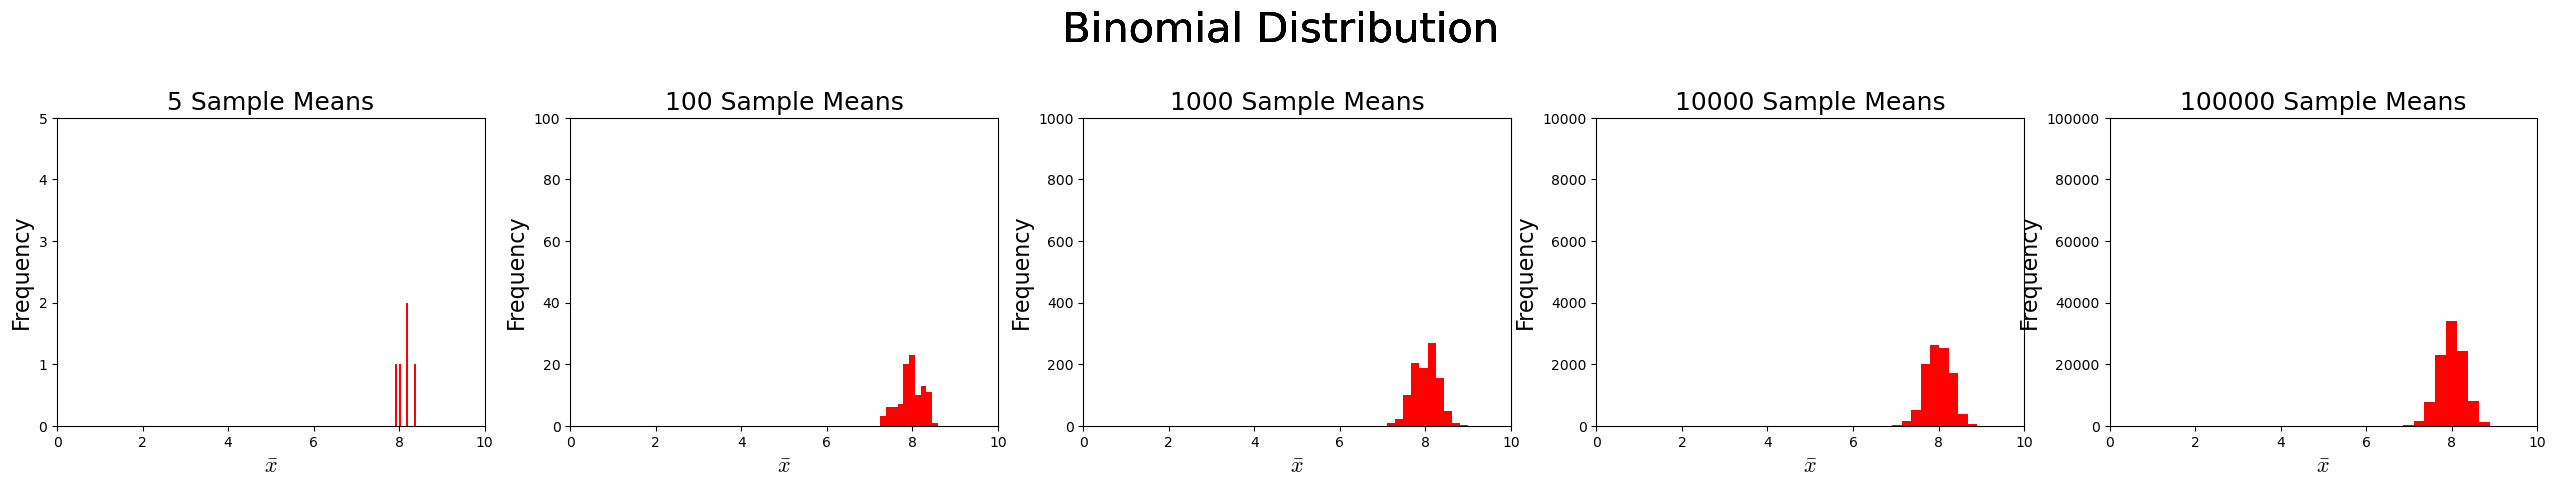

In [15]:
p = 0.8
N = 10

def sample_means(N,p,n,t):
    sample_mean_x = np.zeros(t)
    for i in range(t):
        x = rng.binomial(N,p,(n,))
        sample_mean_x[i] = np.mean(x)
        # print("Sample %d "%(i+1),x)

    return sample_mean_x

t_s = [5,100,1000,10000,100000]


fig,ax = plt.subplots(1,5)
fig.set_size_inches(32,4)

i = 0 
for t in t_s:
    # ax[i].hist(sample_means(p,n,t),bins = int(np.rint(np.sqrt(t))),color='b')
    ax[i].hist(sample_means(N,p,n,t),color = 'r')
    ax[i].set_xlabel('$\\bar{x}$',math_fontfamily = 'cm', fontsize = 16)
    ax[i].set_ylabel('Frequency', fontsize = 16)
    ax[i].set_title('%d Sample Means'%t, fontsize = 18)
    ax[i].set_xlim([0,10])
    ax[i].set_ylim([0,t])
    ax[i].ticklabel_format(axis = 'y',style = 'sci')

    i = i+1

    ax[2].text(-0.5,1250,'Binomial Distribution',fontsize = 30)

## Section 5: Let's do our classes' distribution - Let's name it EGN3443
$X \sim EGN3443(-1,1)$
$f(x) = |x| \,\, \forall \,\,  x \in X; X = [-1,1]$.

(0.0, 1.1)

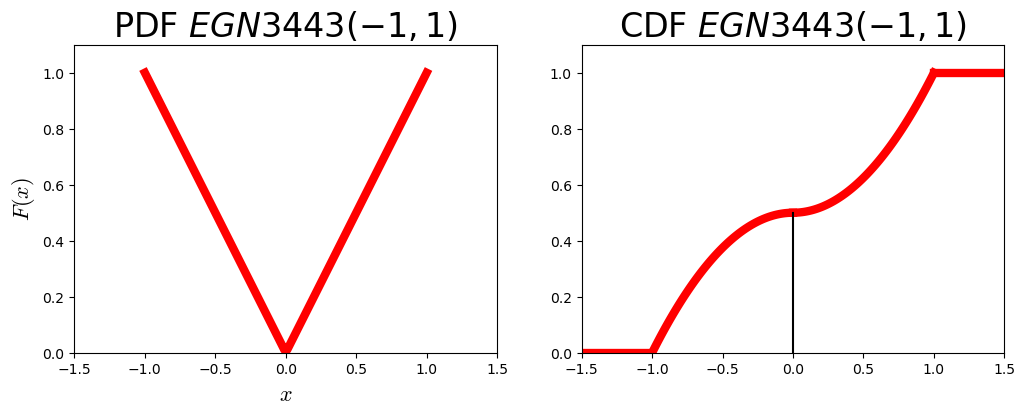

In [16]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,4)

x = np.linspace(-1,1,100)

ax[0].plot(x,np.abs(x),'r',linewidth = 6)
# ax[0].plot([x_pdf[i],x_pdf[i]],[0,poisson_pdf_vals[i]],'k')
ax[0].plot([unif_a,unif_a],[0,1/(unif_b-unif_a)],'k')
ax[0].plot([unif_b,unif_b],[0,1/(unif_b-unif_a)],'k')
ax[0].set_xlabel('$x$',math_fontfamily = 'cm', fontsize = 16)
ax[0].set_ylabel('$f(x)$',math_fontfamily = 'cm', fontsize = 16)
ax[0].set_title('PDF $EGN3443(-1,1)$', fontsize = 24)
ax[0].set_xlim([-1.5,1.5])
ax[0].set_ylim([0,1.1])

x_cdf1 = np.linspace(-1,0,100)
x_cdf2 = np.linspace(0,1,100)
ax[1].plot(x_cdf1,(1 - np.power(x_cdf1,2))/2 ,'r',linewidth = 6)
ax[1].plot(x_cdf2,(1 + np.power(x_cdf2,2))/2 ,'r',linewidth = 6)
ax[1].plot([0,0],[0,0.5] ,'k')
ax[1].plot([-1.5,-1],[0,0] ,'r',linewidth = 6)
ax[1].plot([1,1.5],[1,1] ,'r',linewidth = 6)
ax[0].set_xlabel('$x$',math_fontfamily = 'cm', fontsize = 16)
ax[0].set_ylabel('$F(x)$',math_fontfamily = 'cm', fontsize = 16)
ax[1].set_title('CDF $EGN3443(-1,1)$', fontsize = 24)
ax[1].set_xlim([-1.5,1.5])
ax[1].set_ylim([0,1.1])

# # ax[1].plot([unif_a-1,unif_a],[0,0],'r',linewidth = 6)
# # ax[1].plot([unif_a,unif_b],[0,1],'r',linewidth = 6)
# # ax[1].plot([unif_b,unif_b+1],[1,1],'r',linewidth = 6)
# ax[1].set_xlabel('$x$',math_fontfamily = 'cm',fontsize = 16)
# ax[1].set_ylabel('$F(x)$', math_fontfamily = 'cm',fontsize = 16)
# ax[1].set_title('CDF $Exp(%.2f)$'%(lamb_da), fontsize = 24)
# ax[1].set_xlim([0,5])
# ax[1].set_ylim([0,1.1])

Text(-0.5, 1250, 'EGN3443 Distribution')

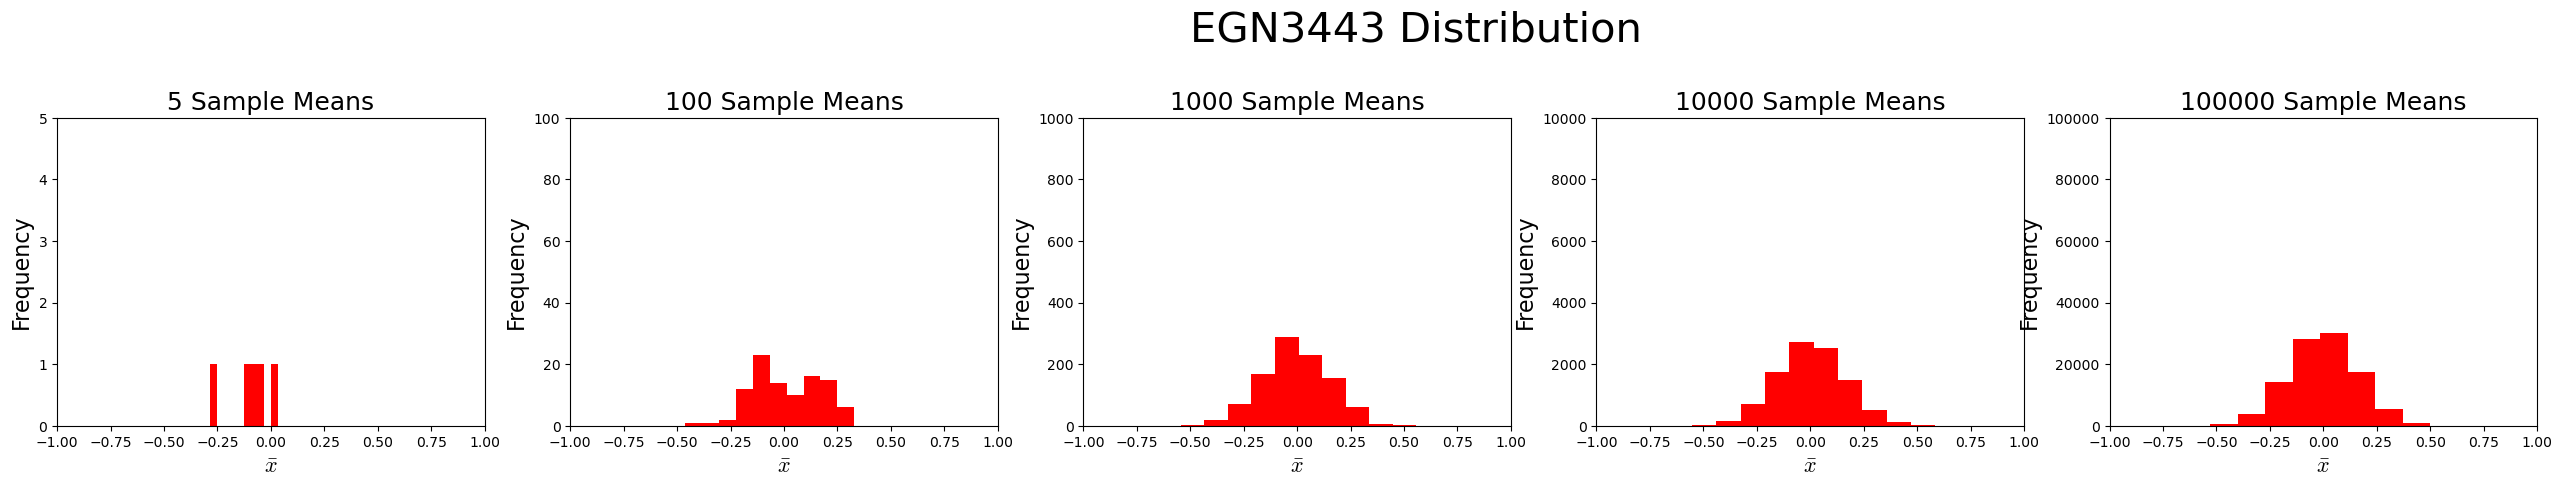

In [17]:
def inv_cdf_egn3443(cdf_vals):
    inds = cdf_vals < 0.5
    
    return inds*-1*np.sqrt(np.abs(1-2*cdf_vals)) + (1-inds)*np.sqrt(np.abs(2*cdf_vals-1))


def sample_means(n,t):
    sample_mean_x = np.zeros(t)
    for i in range(t):
        cdf_vals = rng.uniform(0,1,(n,))
        x = inv_cdf_egn3443(cdf_vals)
        sample_mean_x[i] = np.mean(x)
        # print("Sample %d "%(i+1),x)

    return sample_mean_x

t_s = [5,100,1000,10000,100000]


fig,ax = plt.subplots(1,5)
fig.set_size_inches(32,4)

i = 0 
for t in t_s:
    # ax[i].hist(sample_means(p,n,t),bins = int(np.rint(np.sqrt(t))),color='b')
    ax[i].hist(sample_means(n,t),color = 'r')
    ax[i].set_xlabel('$\\bar{x}$',math_fontfamily = 'cm', fontsize = 16)
    ax[i].set_ylabel('Frequency', fontsize = 16)
    ax[i].set_title('%d Sample Means'%t, fontsize = 18)
    ax[i].set_xlim([-1,1])
    ax[i].set_ylim([0,t])
    ax[i].ticklabel_format(axis = 'y',style = 'sci')


    i = i+1

ax[2].text(-0.5,1250,'EGN3443 Distribution',fontsize = 30)